In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)

2.3.0


11493376/11490434 [==============================] - 0s 0us/step
train: (60000, 28, 28) (60000,)
test: (10000, 28, 28) (10000,)
y train: [5 0 4 1 9 2 1 3 1 4]
y test: [7 2 1 0 4 1 4 9 5 9]


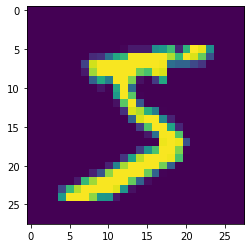

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('train:', x_train.shape, y_train.shape)
print('test:', x_test.shape, y_test.shape)
print('y train:', y_train[:10])
print('y test:', y_test[:10])

plt.imshow(x_train[0, :, :])

In [3]:
def list_to_onehot(x, num_class=10):
  onehot = np.zeros([x.shape[0], num_class], dtype=np.float64)
  onehot[np.arange(x.shape[0]), x] = 1.0
  return onehot

def split_train_val(x, y, rate_train=0.7):
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)
  i = int(x.shape[0]*rate_train)
  return (x[indices[:i]], y[indices[:i]]), (x[indices[i:]], y[indices[i:]])

preprocess_samples = lambda x : x / 255.

(x_train, y_train), (x_val, y_val) = split_train_val(x_train, y_train)
x_train = preprocess_samples(x_train)
x_val = preprocess_samples(x_val)
x_test = preprocess_samples(x_test)

x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = list_to_onehot(y_train)
y_val = list_to_onehot(y_val)
y_test = list_to_onehot(y_test)
for it in y_train[:10]:
  print(it)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
model = tf.keras.models.Sequential(name='simple_cnn')
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Softmax())
model.summary()

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model: "simple_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               401664    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [10]:
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=16,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/16
329/329 [==============================] - 29s 89ms/step - loss: 0.3912 - accuracy: 0.8795 - val_loss: 0.1086 - val_accuracy: 0.9674
Epoch 2/16
329/329 [==============================] - 30s 92ms/step - loss: 0.1129 - accuracy: 0.9645 - val_loss: 0.0717 - val_accuracy: 0.9782
Epoch 3/16
329/329 [==============================] - 29s 88ms/step - loss: 0.0857 - accuracy: 0.9746 - val_loss: 0.0644 - val_accuracy: 0.9808
Epoch 4/16
329/329 [==============================] - 29s 89ms/step - loss: 0.0667 - accuracy: 0.9799 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 5/16
329/329 [==============================] - 29s 89ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0508 - val_accuracy: 0.9844
Epoch 6/16
329/329 [==============================] - 29s 89ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 7/16
329/329 [==============================] - 29s 88ms/step - loss: 0.0415 - accuracy: 0.9866 - val_loss: 0.0464 - val_accuracy:

In [11]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0306 - accuracy: 0.9912
